<a href="https://colab.research.google.com/github/2303A51144/AIML-2025_B17/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

part_1

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

         

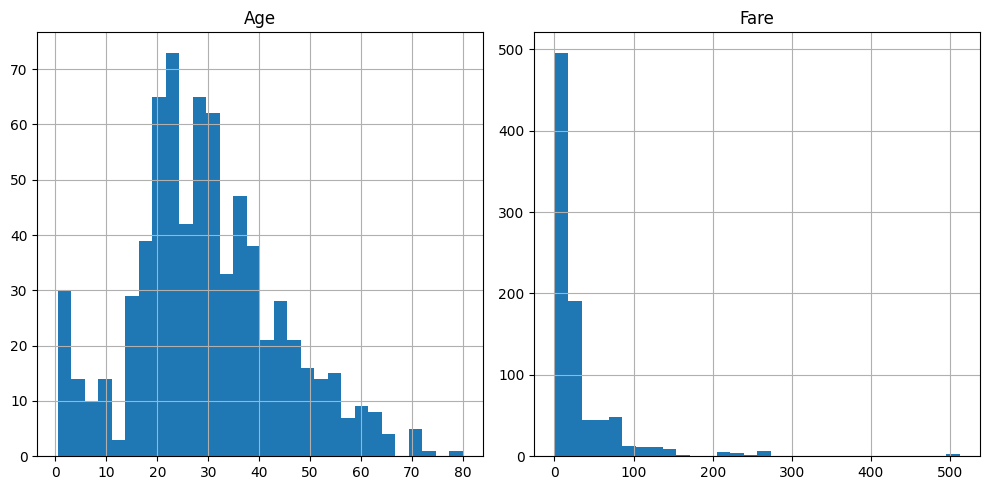

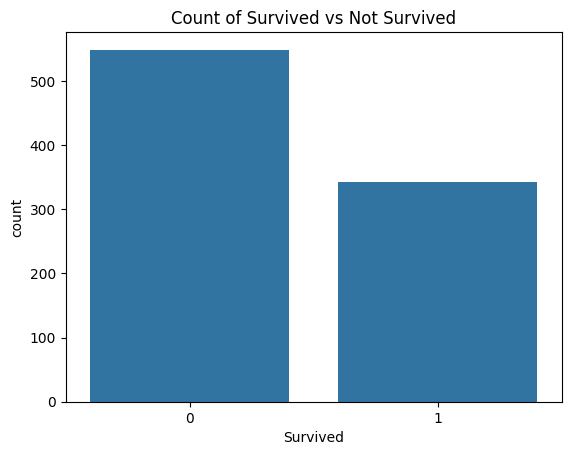

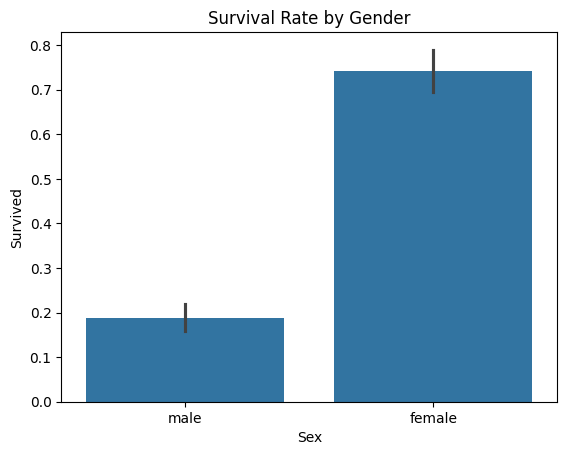

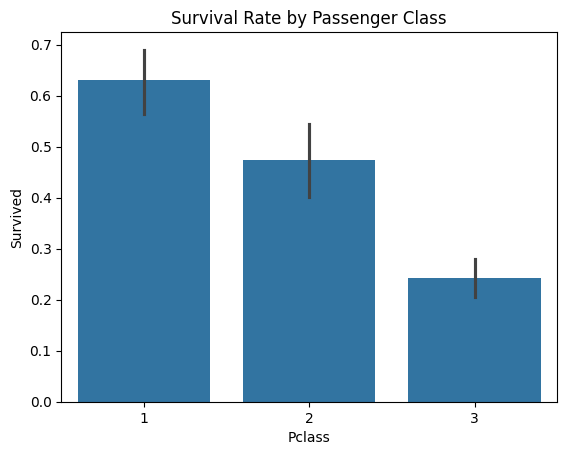

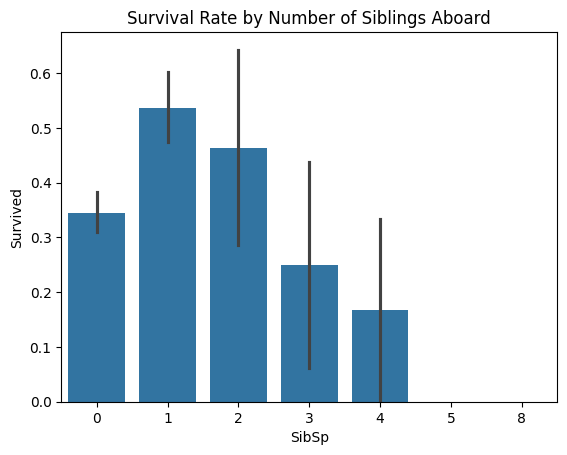

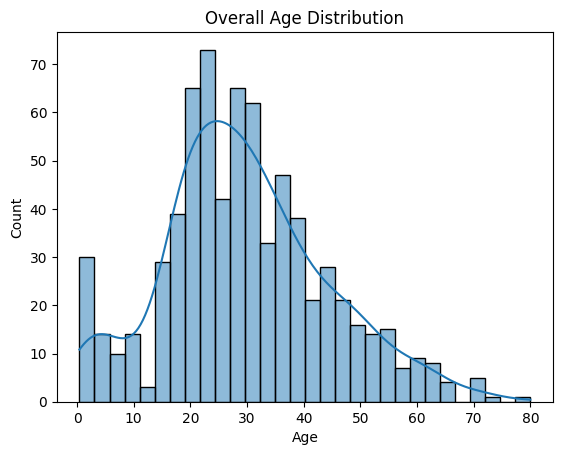

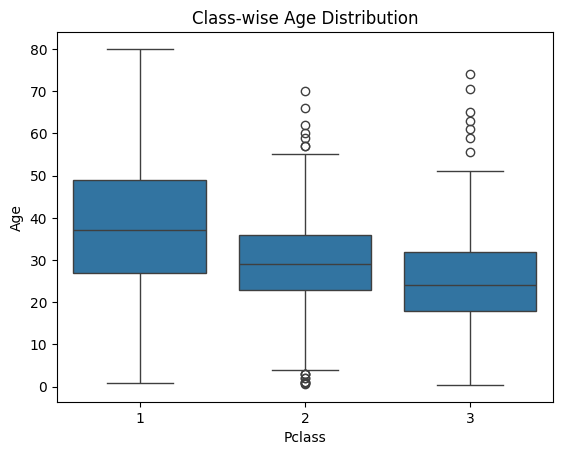

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500       2.0
1            2         1       1    1  38.0      1      0  71.2833       0.0
2            3         1       3    1  26.0      0      0   7.9250       2.0
3            4         1       1    1  35.0      1      0  53.1000       2.0
4            5         0       3    0  35.0      0      0   8.0500       2.0


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic_df = pd.read_csv('titanic_train.csv')
print(titanic_df.dtypes)
summary_stats = titanic_df.describe(percentiles=[.25, .5, .75, .9])
print(summary_stats)
column_names = titanic_df.columns.tolist()
print(column_names)
numeric_features = ['Age', 'Fare']
titanic_df[numeric_features].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Survived vs Not Survived')
plt.show()
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Survival Rate by Number of Siblings Aboard')
plt.show()
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Overall Age Distribution')
plt.show()
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Class-wise Age Distribution')
plt.show()
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.drop(columns=['Ticket', 'Name', 'Cabin'], inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print(titanic_df.head())

part_2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


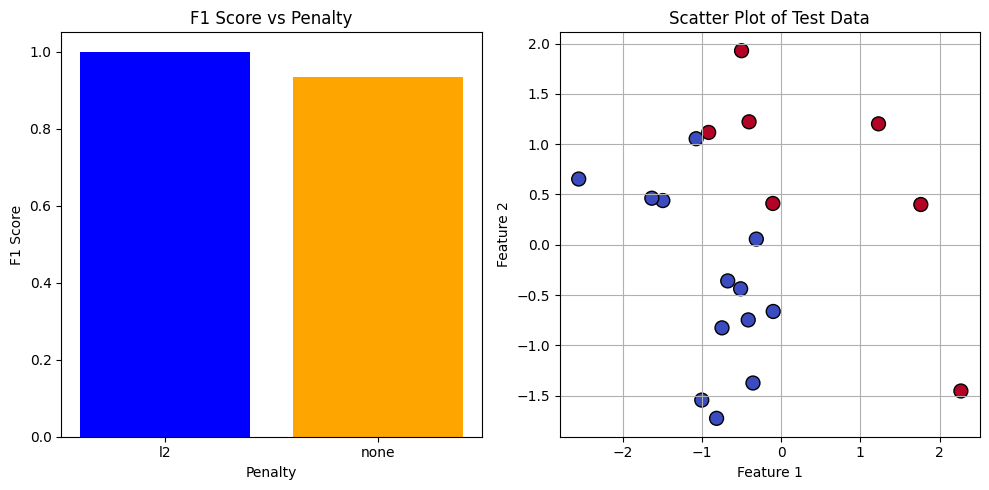

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
np.random.seed(0)
X = np.random.randn(100, 2)
Y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

penalties = ['l2', 'none']
f1_scores = []
for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=1000)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    f1_scores.append(f1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(penalties, f1_scores, color=['blue', 'orange'])
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()